# Initialization

In [31]:
import pandas as pd
#Reference: https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb
import re
#References: https://www.regular-expressions.info/ and https://www.w3schools.com/python/python_regex.asp
import matplotlib.pyplot as plt
#Reference: https://matplotlib.org/
import random
#Reference: https://www.pythonforbeginners.com/random/how-to-use-the-random-module-in-python 

In [32]:
import nltk
from nltk.tokenize import TweetTokenizer
tweet = TweetTokenizer()
#Reference: https://www.nltk.org/api/nltk.tokenize.html

# Token, Types and TTR 

In [33]:
a = pd.read_csv(r"C:\Users\family\Desktop\tweets-dataset.csv")

#Find tokens

#alpha = " ".join(list(a['Sentence']))                    //Convert all information into a single string 
#alpha = alpha.lower()                                    //Lowercasing the strings
#alpha = re.sub('(https://[^\s]+|pic[^\s]+)', '', alpha)              //Remove all the urls using regex
#tokens = tweet.tokenize(alpha)                           //Applying tweet tokenization

#Here is the combination of the above 4 codes represnted as one
tokens = tweet.tokenize(re.sub('(https?://[^\s]+|pic[^\s]+)', '', " ".join(list(a['Sentence']))).lower()) 
#Reference: https://www.nltk.org/api/nltk.tokenize.html
#Regex References: https://www.regular-expressions.info/ and https://www.w3schools.com/python/python_regex.asp

#Find the length of the token
token_length = len(tokens)
print("Token Length: " + str(token_length))


#Finding the length of types
types_length = len(set(tokens))
print("Type length: " + str(types_length))


#Finding TTR
TTR = types_length / token_length
print("Token to Type ratio: " + str(TTR))

Token Length: 364068
Type length: 38971
Token to Type ratio: 0.107043189733786


# Zipf's Law for length

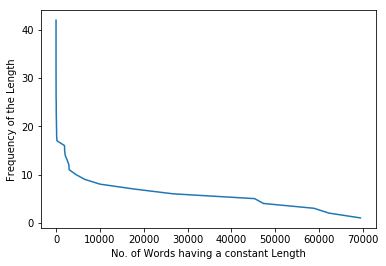

In [34]:
#Computing number of strings that have same length for all lengths
d = {}
for i in tokens:
    if len(i) not in d: d[len(i)] = 1
    else: d[len(i)] += 1

#Sort the frequencies according to the decreasing order i.e finding the frequency
e = [d[i] for i in d]
e.sort(reverse = True)

#Plot it in a graph
plt.xlabel("No. of Words having a constant Length")
plt.ylabel("Frequency of the Length")
plt.plot(e, [i for i in range(1, len(e) + 1)])
plt.show()
#Reference: https://matplotlib.org/ and https://classroom.google.com/u/0/c/NDEzNDY5MjY2NTFa

# Zipf's law for meaning

In [178]:
thesaurus = [
    ['like', 'alike', 'comparable', 'related', 'admire', 'appreciate', 'love', 'please', 'prefer', 'want', 'go for', 'adore', 'feel like', 'please', 'prefer', 'want', 'desire', 'cherish', 'agnate', 'allied', 'ally', 'allying', 'matching', 'near', 'relating', 'resembling', 'twin', 'uniform', 'corresponding', 'double', 'will'], 
    ['love', 'passion', 'beloved', 'dear', 'dearest', 'honey', 'enjoy', 'affection', 'emotion', 'devotion', 'fondness', 'respect', 'friendship', 'infatuation', 'yearning', 'know', 'do_it', 'be_intimate', 'romeo', 'dearest', 'angel', 'care for', 'worship', 'cherish', 'embrace', 'feel'],
    ['will', 'attitude', 'decision', 'desire', 'determination', 'discipline', 'bequest', 'confer', 'disinherit','feeling', 'inclination', 'intention', 'mind', 'passion', 'power', 'resolution', 'resolve', 'wish', 'opt', 'please', 'leave', 'confer', 'devise', 'crave', 'opt', 'probate', 'transfer', 'disinherit', 'bequest'], 
    ['sorry', 'dismal', 'no-good', 'disconsolate', 'pitiful', 'regretful', 'good-for-nothing', 'apology', 'unhappy', 'sorrowful'],
    ['lead', 'guide', 'precede', 'moderate', 'tip', 'chair', 'principal'],
    ['right', 'legal', 'honest', 'legitimate', 'proper', 'suitable', 'true', 'accurate', 'precise', 'perfect', 'right-hand', 'rightfulness', 'correct', 'proper', 'the_right_way', 'good', ],
    ['watch', 'keep_an_eye_on', 'scout', 'learn', 'vigil', 'check', 'observe', 'find_out', 'see', 'follow', 'view', 'lookout', 'catch', 'ascertain', 'ticker', 'sentinel'],
    ['god', 'immortal', 'graven_image', 'deity', 'divinity', 'God', 'Supreme_Being', 'idol', 'Allah', 'lord', 'master', 'holiness', 'almighty', 'creator'],
    ['old', 'onetime', 'older', 'one-time', 'quondam', 'sure-enough', 'honest-to-god', 'former', 'Old', 'sometime', 'previous', 'honest-to-goodness', 'erstwhile'],
    ['same', 'carbon', 'xerox', 'clone', 'ditto', 'double', 'dupe', 'duplicate', 'equal', 'equivalent', 'like', 'look-alike', 'twin', 'constant', 'invariable', 'uniform']
]
#This is thesaurus of ten words
#They are like, love, will, slow, sorry, right, watch, god, old, same.
#References: https://www.guru99.com/wordnet-nltk.html and https://www.thesaurus.com/

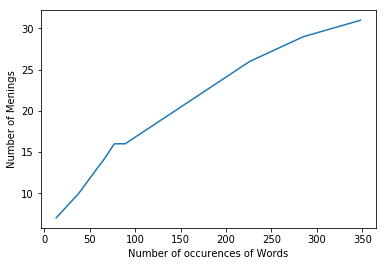

In [186]:
#Getting the frequency of the words in thesaurus
m = {}
n = []
for j in range(len(thesaurus)):
    m[thesaurus[j][0]] = [0, len(thesaurus[j])]
    n.append(thesaurus[j][0])
for i in tokens:
    if i in n:
        m[i][0] += 1

#Plotting in a graph
plt.plot(sorted([m[i][0] for i in m]), sorted([m[i][1] for i in m]))
plt.xlabel("Number of occurences of Words")
plt.ylabel("Number of Menings")
plt.show()
#References: https://www.guru99.com/wordnet-nltk.html and https://matplotlib.org/

In [188]:
#Another way
def getSynonyms(data1):
    synonymList1 = []
    wordnetSynset1 = wordnet.synsets(data1)

    for synset1 in wordnetSynset1:
        for synWords1 in synset1.lemma_names():
            synonymList1.append(synWords1)
    return synonymList1

meanings = {}
for i in range(len(tokens)):
    a = tokens[i]
    if wordnet.synsets(a):
        b = len(getSynonyms(a))
        if a not in meanings: meanings[a] = [1, b]
        else: meanings[a][0] += 1


plt.scatter([meanings[word][1] for word in meanings], [meanings[word][0] for word in meanings])
plt.show()

#References: https://stackoverflow.com/questions/45035207/how-to-find-a-synonyms-in-a-list-of-strings-using-nltk-synsets and https://matplotlib.org/

# Heap's law

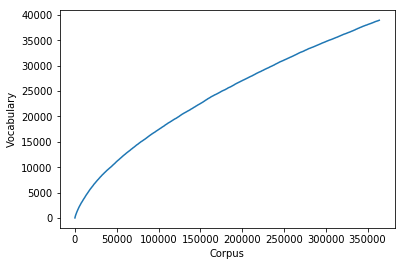

In [96]:
#finding number of words that have a constant length
Vocabulary = []
VL = [0]
for i in range(len(tokens)):
    if tokens[i] not in Vocabulary: 
        Vocabulary.append(tokens[i])
        VL.append(VL[-1] + 1)
    else: VL.append(VL[-1])

#plotting it in a graph       
plt.xlabel("Corpus")
plt.ylabel("Vocabulary")
plt.plot([i for i in range(1, len(tokens) + 1)], VL[1:])
plt.show()
#References: https://matplotlib.org/ and https://classroom.google.com/u/0/c/NDEzNDY5MjY2NTFa